# Repeated Reclassification Experiments

## Notebook Setup

In [2]:
import sys
sys.path.append("../src")
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from project import preprocessing, rf_models, mc_experiments

In [5]:
RNG_SEED = 73 # for numpy
RANDOM_STATE = 37 #for pandas sampling

In [6]:
df_re = pd.read_csv("../data/re_custody_2017_gsprs.csv", low_memory=False)

## Reclassification Random Forest Setup

In [7]:
df = preprocessing.preprocess_input_vars_re(df_re)
data = df[
    [
        "gender_female",
        "age",
        "race_B",
        "race_A",
        "race_H",
        "race_I",
        "race_O",
        "off_1_prs_max",
        "off_1_gs_max",
        "re_custody_level",
        "ic_custdy_level",
        "prior_commits",
        "re_discip_reports",
        "re_escp_hist_1",
        "re_escp_hist_2",
        "re_escp_hist_3",
        "re_escp_hist_4",
        "re_escp_hist_5",
        "control_number"
    ]
]
data = data[data["ic_custdy_level"] > 1]
data = data.dropna()

X = data.drop(["control_number", "re_custody_level"], axis=1)
Y = data["re_custody_level"]

In [8]:
df_re.ic_custdy_level.value_counts()

4.0    12413
3.0    11347
2.0     4806
5.0       83
1.0        2
Name: ic_custdy_level, dtype: int64

In [9]:
re_rf_model = rf_models.BasicRFModel(X, Y)
re_rf_model.fit()

## 4 People Across the 4 Reclassification Levels

Randomly pick 4 people (one from each reclassification custody level) and do the repeated reclassification 10 times

In [20]:
np.random.seed(RNG_SEED)
all_five_lvl_all_random = mc_experiments.RepeatedReclassExp(
    data.groupby("re_custody_level").sample(random_state=RANDOM_STATE),
    "re_custody_level",
    re_rf_model
)

In [21]:
all_five_lvl_all_random.run_reclassifications(
    N=10,
    ignore_vars=["control_number", "re_custody_level"]
)

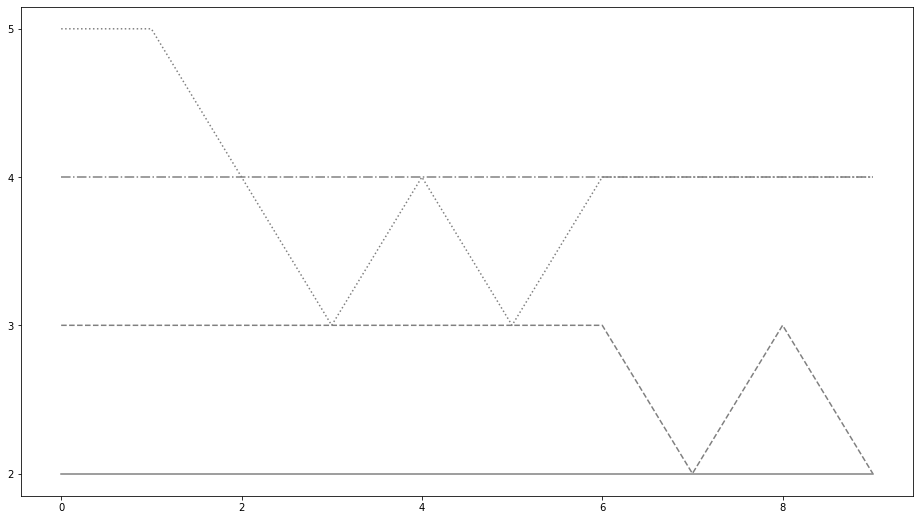

In [22]:
all_five_lvl_all_random.plot_tragectories(False, dif_linestyles=True)

In [12]:
all_five_lvl_all_random.calc_average_change_by_cust_per_person_per_year()

{2.0: 0.0, 3.0: 0.1, 4.0: 0.0, 5.0: 0.5}

## Randomly Pick 10 People From Each Reclass Level

In [53]:
np.random.seed(RNG_SEED)
all_five_lvl_10_random = mc_experiments.RepeatedReclassExp(
    data.groupby("re_custody_level").sample(10, random_state=RANDOM_STATE),
    "re_custody_level",
    re_rf_model
)

In [54]:
all_five_lvl_10_random.run_reclassifications(
    N=10,
    ignore_vars=["control_number", "re_custody_level"]
)

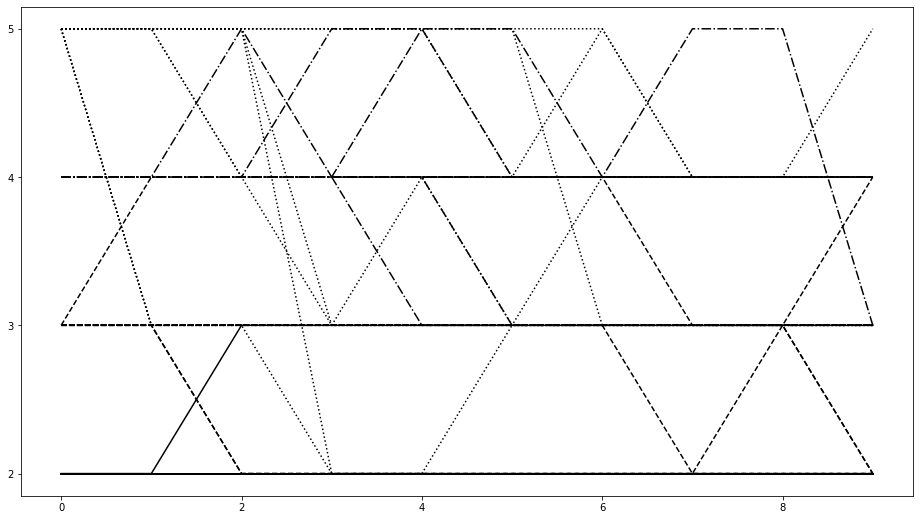

In [55]:
all_five_lvl_10_random.plot_tragectories(avg=False, dif_linestyles=True)

In [46]:
all_five_lvl_10_random.calc_average_change_by_cust_per_person_per_year()

{2.0: 0.01, 3.0: 0.09, 4.0: 0.11000000000000001, 5.0: 0.26}

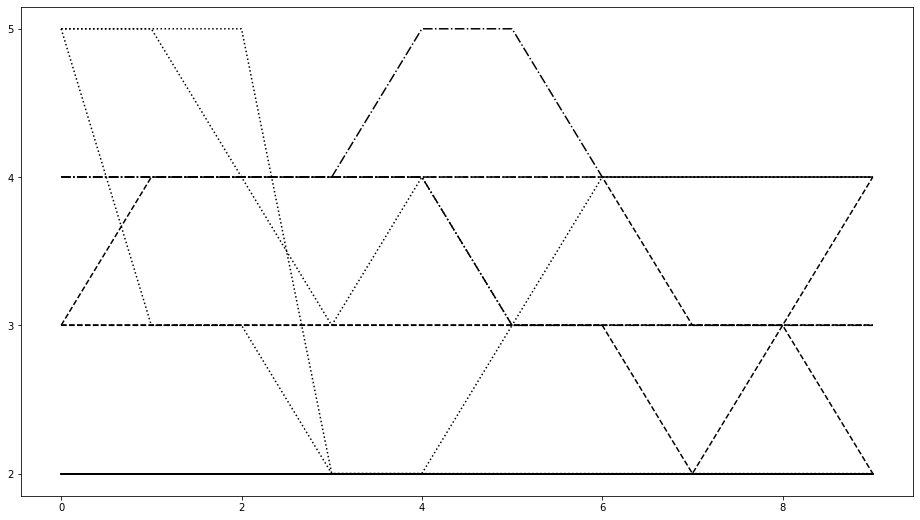

In [48]:
np.random.seed(RNG_SEED)
all_five_lvl_3_random = mc_experiments.RepeatedReclassExp(
    data.groupby("re_custody_level").sample(3, random_state=RANDOM_STATE),
    "re_custody_level",
    re_rf_model
)

all_five_lvl_3_random.run_reclassifications(
    N=10,
    ignore_vars=["control_number", "re_custody_level"]
)

all_five_lvl_3_random.plot_tragectories(avg=False, dif_linestyles=True)

## Pick 10 White and 10 Black Inmates from Level 2 to 5

### Temporarily changed it to 100 inmates to get less variability

In [10]:
repeated_reclass_black_10per = mc_experiments.RepeatedReclassExp(
    data[data["race_B"] == 1].groupby("re_custody_level").sample(100, random_state=RANDOM_STATE),
    "re_custody_level",
    re_rf_model
)

In [50]:
repeated_reclass_black_10per.run_reclassifications(10, ["control_number"])

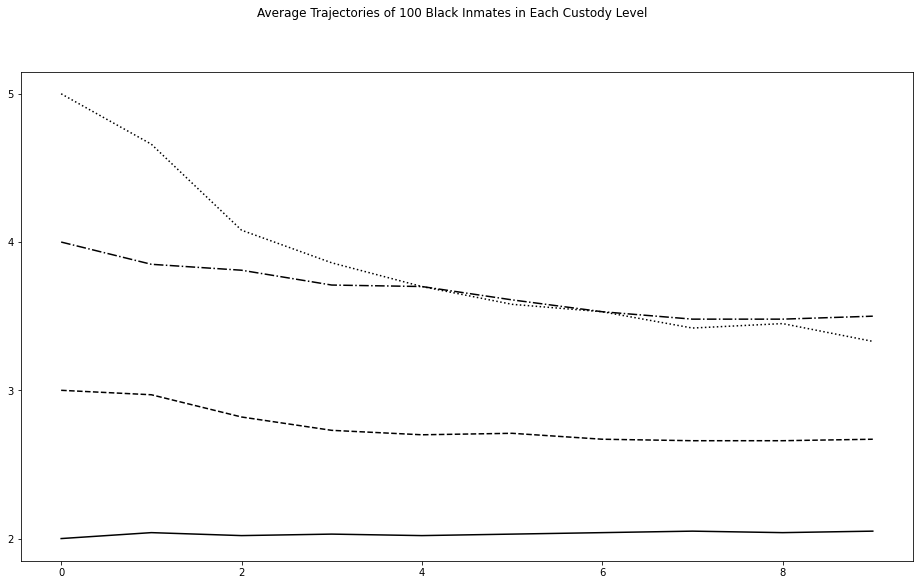

In [52]:
repeated_reclass_black_10per.plot_tragectories(title="Average Trajectories of 100 Black Inmates in Each Custody Level", dif_linestyles=True)

In [84]:
repeated_reclass_black_10per.calc_average_change_by_cust_per_person_per_year()

{2.0: 0.034, 3.0: 0.087, 4.0: 0.135, 5.0: 0.24700000000000003}

In [11]:
repeated_reclass_white_10per = mc_experiments.RepeatedReclassExp(
    data[
        (data["race_B"] == 0) &
        (data["race_A"] == 0) &
        (data["race_I"] == 0) &
        (data["race_H"] == 0) &
        (data["race_O"] == 0)
    ].groupby("re_custody_level").sample(100, random_state=RANDOM_STATE),
    "re_custody_level",
    re_rf_model
)

In [12]:
repeated_reclass_white_10per.run_reclassifications(10, ["control_number"])

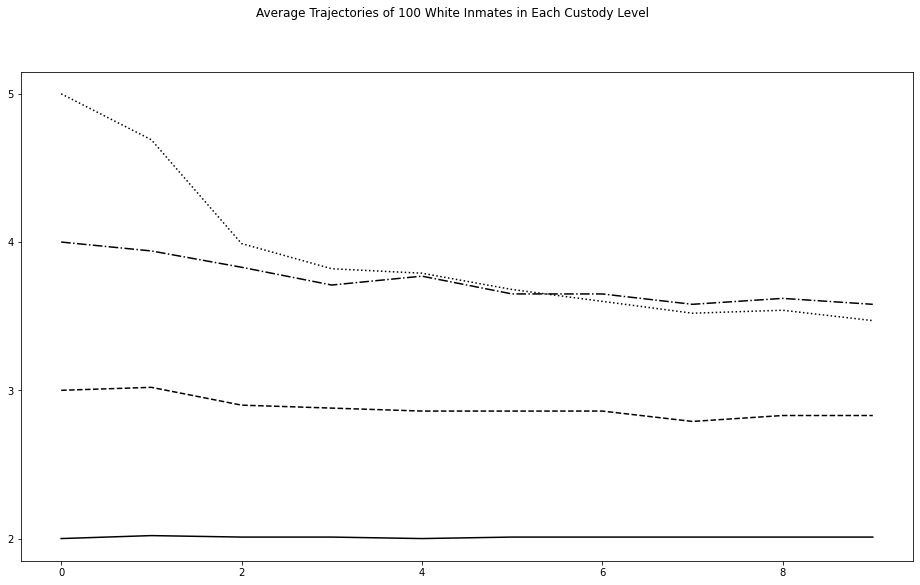

In [13]:
repeated_reclass_white_10per.plot_tragectories(title="Average Trajectories of 100 White Inmates in Each Custody Level", dif_linestyles=True)

In [88]:
repeated_reclass_white_10per.calc_average_change_by_cust_per_person_per_year()

{2.0: 0.003, 3.0: 0.099, 4.0: 0.095, 5.0: 0.22000000000000003}

In [89]:
repeated_reclass_black_10per.calc_average_change_by_cust_per_person_per_year()

{2.0: 0.034, 3.0: 0.087, 4.0: 0.135, 5.0: 0.24700000000000003}

## Pick 100? Random Inmates from Level 2 to 5 One at a time


In [30]:
repeated_reclass_random_100per =  mc_experiments.RepeatedReclassExp(
    data.groupby("re_custody_level").sample(100, random_state=RANDOM_STATE),
    "re_custody_level",
    re_rf_model
)

In [31]:
repeated_reclass_random_100per.run_reclassifications(10, ["control_number"])

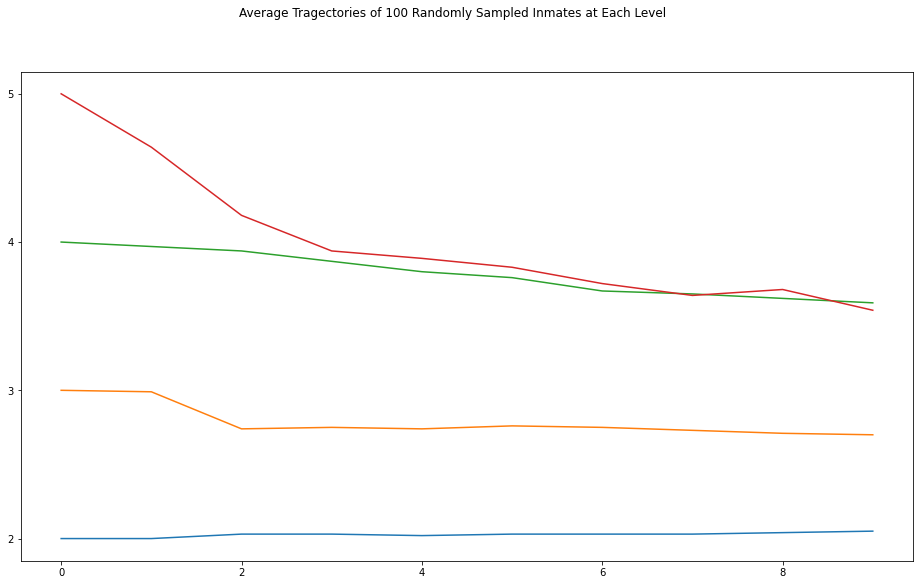

In [32]:
repeated_reclass_random_100per.plot_tragectories(title='Average Tragectories of 100 Randomly Sampled Inmates at Each Level')

In [33]:
repeated_reclass_random_100per.calc_average_change_by_cust_per_person_per_year()

{2.0: 0.007000000000000001, 3.0: 0.074, 4.0: 0.119, 5.0: 0.22599999999999998}

## Repeated Reclassification Over Long Time

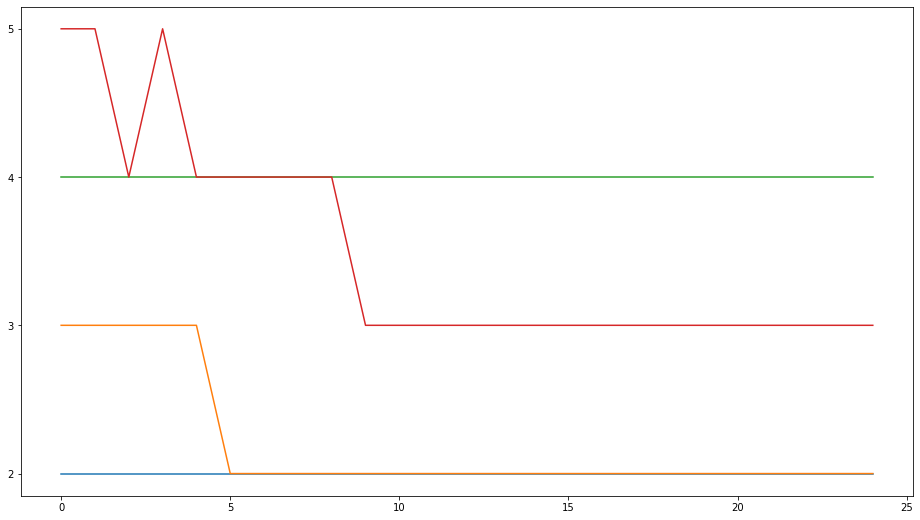

In [15]:
np.random.seed(RNG_SEED)
all_five_lvl_all_random = mc_experiments.RepeatedReclassExp(
    data.groupby("re_custody_level").sample(random_state=RANDOM_STATE),
    "re_custody_level",
    re_rf_model
)

all_five_lvl_all_random.run_reclassifications(
    N=25,
    ignore_vars=["control_number", "re_custody_level"]
)
all_five_lvl_all_random.plot_tragectories()

In [16]:
all_five_lvl_all_random.calc_average_change_by_cust_per_person_per_year()

{2.0: 0.0, 3.0: 0.04, 4.0: 0.0, 5.0: 0.16}

In [19]:
np.random.seed(RNG_SEED)
all_five_lvl_50_random = mc_experiments.RepeatedReclassExp(
    data.groupby("re_custody_level").sample(50, random_state=RANDOM_STATE),
    "re_custody_level",
    re_rf_model
)
all_five_lvl_50_random.run_reclassifications(
    N=100,
    ignore_vars=["control_number", "re_custody_level"]
)

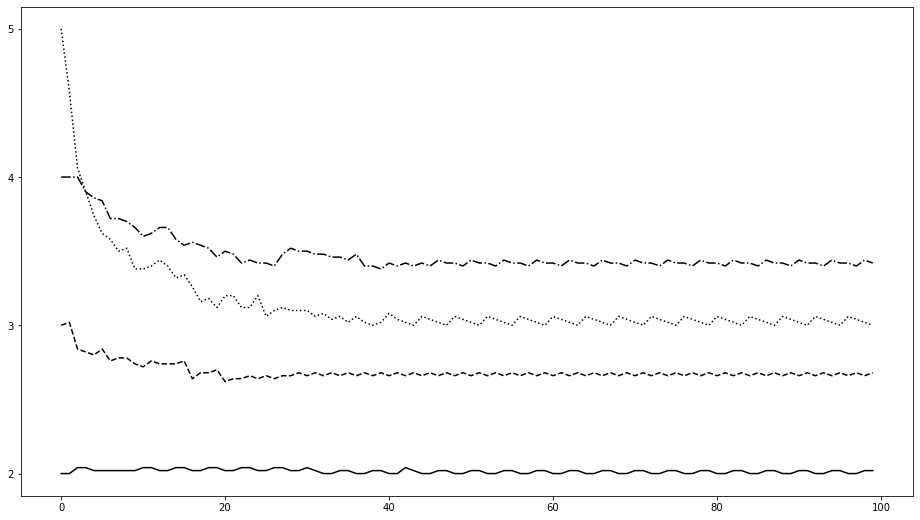

In [20]:
all_five_lvl_50_random.plot_tragectories( dif_linestyles=True)

In [38]:
all_five_lvl_50_random.calc_average_change_by_cust_per_person_per_year()

{2.0: 0.018, 3.0: 0.074, 4.0: 0.101, 5.0: 0.197}

In [39]:
repeated_reclass_b = mc_experiments.RepeatedReclassExp(
    data[data["race_B"] == 1].groupby("re_custody_level").sample(10, random_state=RANDOM_STATE),
    "re_custody_level",
    re_rf_model
)

In [41]:
repeated_reclass_b.run_reclassifications(100, ["control_number"])

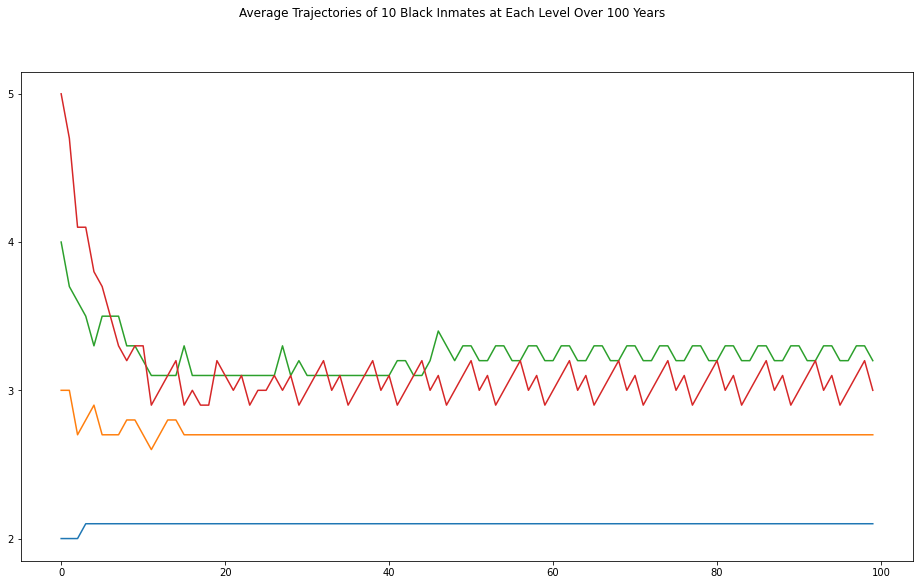

In [42]:
repeated_reclass_b.plot_tragectories(title="Average Trajectories of 10 Black Inmates at Each Level Over 100 Years")

In [44]:
repeated_reclass_b.calc_average_change_by_cust_per_person_per_year()

{2.0: 0.001, 3.0: 0.017, 4.0: 0.064, 5.0: 0.192}

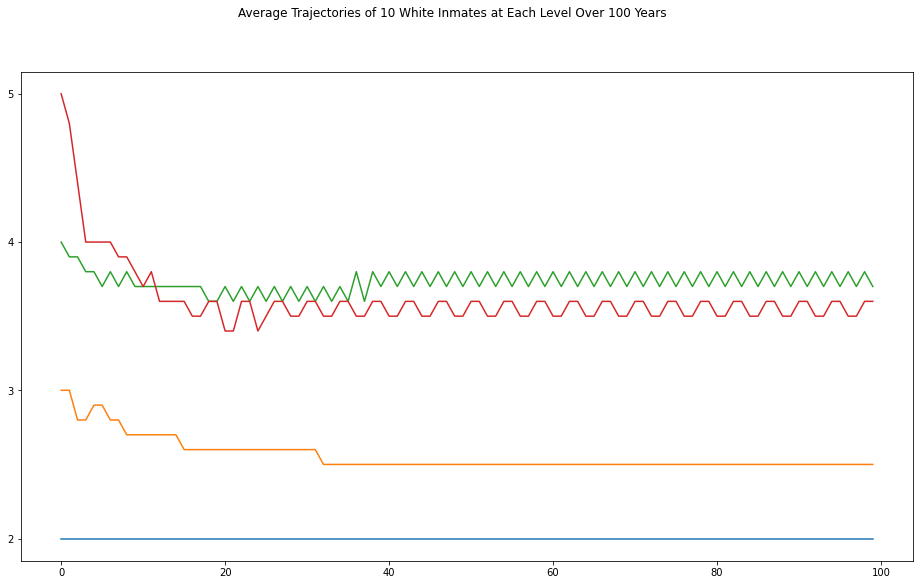

In [43]:
repeated_reclass_w = mc_experiments.RepeatedReclassExp(
    data[
        (data["race_B"] == 0) &
        (data["race_A"] == 0) &
        (data["race_H"] == 0) &
        (data["race_I"] == 0) &
        (data["race_O"] == 0) 
    ].groupby("re_custody_level").sample(10, random_state=RANDOM_STATE),
    "re_custody_level",
    re_rf_model
)
repeated_reclass_w.run_reclassifications(100, ["control_number"])
repeated_reclass_w.plot_tragectories(title="Average Trajectories of 10 White Inmates at Each Level Over 100 Years")

In [45]:
repeated_reclass_w.calc_average_change_by_cust_per_person_per_year()

{2.0: 0.0, 3.0: 0.009000000000000001, 4.0: 0.115, 5.0: 0.07}

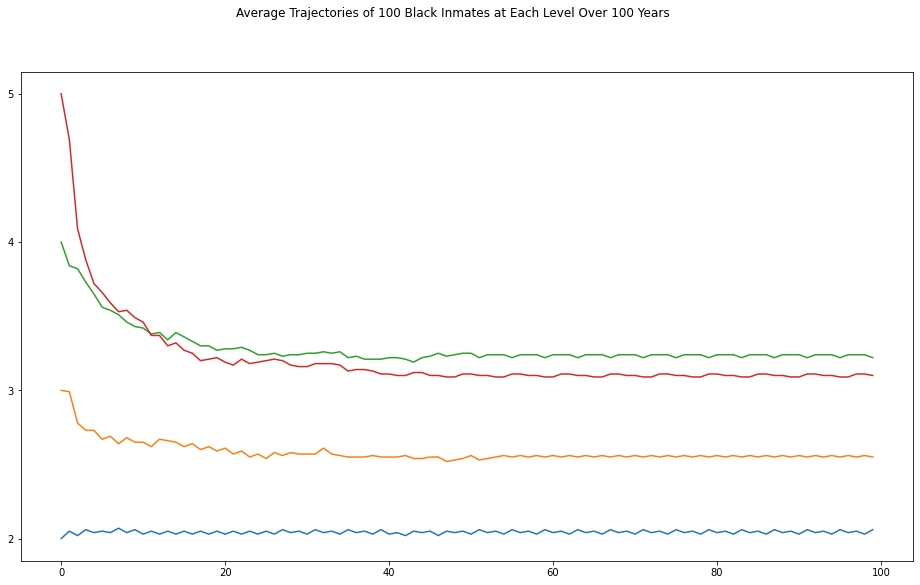

In [48]:
repeated_reclass_b = mc_experiments.RepeatedReclassExp(
    data[data["race_B"] == 1].groupby("re_custody_level").sample(100, random_state=RANDOM_STATE),
    "re_custody_level",
    re_rf_model
)
repeated_reclass_b.run_reclassifications(100, ["control_number"])
repeated_reclass_b.plot_tragectories(title="Average Trajectories of 100 Black Inmates at Each Level Over 100 Years")

In [49]:
repeated_reclass_b.calc_average_change_by_cust_per_person_per_year()

{2.0: 0.0256, 3.0: 0.0327, 4.0: 0.0452, 5.0: 0.0768}

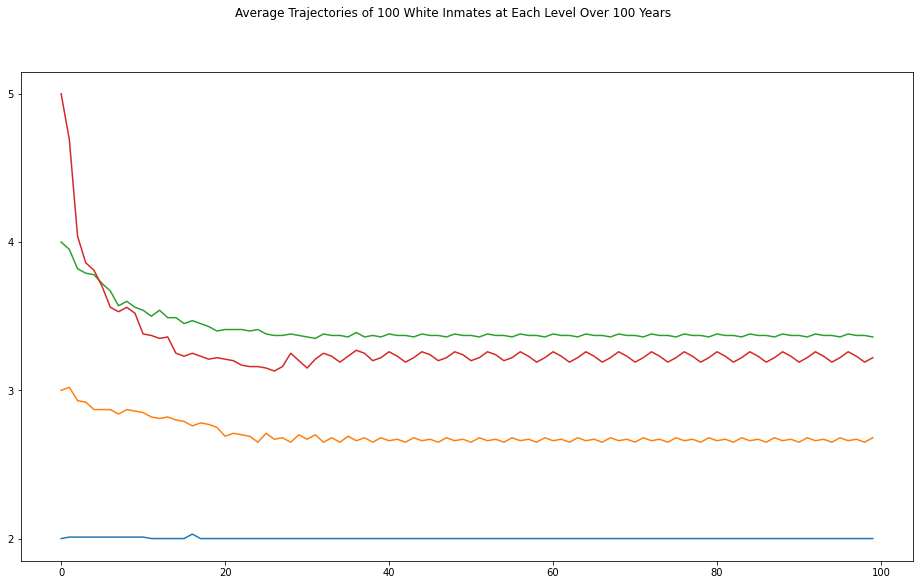

In [50]:
repeated_reclass_w = mc_experiments.RepeatedReclassExp(
    data[
        (data["race_B"] == 0) &
        (data["race_A"] == 0) &
        (data["race_H"] == 0) &
        (data["race_I"] == 0) &
        (data["race_O"] == 0) 
    ].groupby("re_custody_level").sample(100, random_state=RANDOM_STATE),
    "re_custody_level",
    re_rf_model
)
repeated_reclass_w.run_reclassifications(100, ["control_number"])
repeated_reclass_w.plot_tragectories(title="Average Trajectories of 100 White Inmates at Each Level Over 100 Years")

In [51]:
repeated_reclass_w.calc_average_change_by_cust_per_person_per_year()

{2.0: 0.001, 3.0: 0.05, 4.0: 0.0304, 5.0: 0.0794}